In [1]:
import itertools
#import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score
#from sklearn import preprocessing,cross_validation,neighbors
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from time import time
%matplotlib inline

In [18]:
dataset = pd.read_csv('wdbc.csv')

In [19]:
dataset.head()

,id,diagnoses,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Converting data set class 'B' and 'M' as 0 and 1


In [21]:
dataset.drop(['id'],1,inplace=True)
dataset=dataset.replace({'diagnoses':{'B':0, 'M':1}})
dataset.head()

C:\Users\Zohaib\AppData\Local\Temp\ipykernel_8776\2932133224.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(['id'],1,inplace=True)


,diagnoses,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X = dataset.iloc[:, 1:32].values
Y = dataset.iloc[:, 0].values

print(X)
print(Y)
X.shape

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

(569, 30)

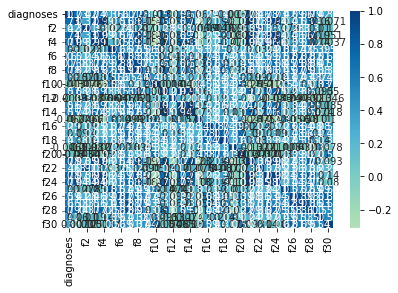

In [23]:
import seaborn as sns
sns.heatmap(dataset.corr(), center = 0, annot =True, cmap='GnBu');

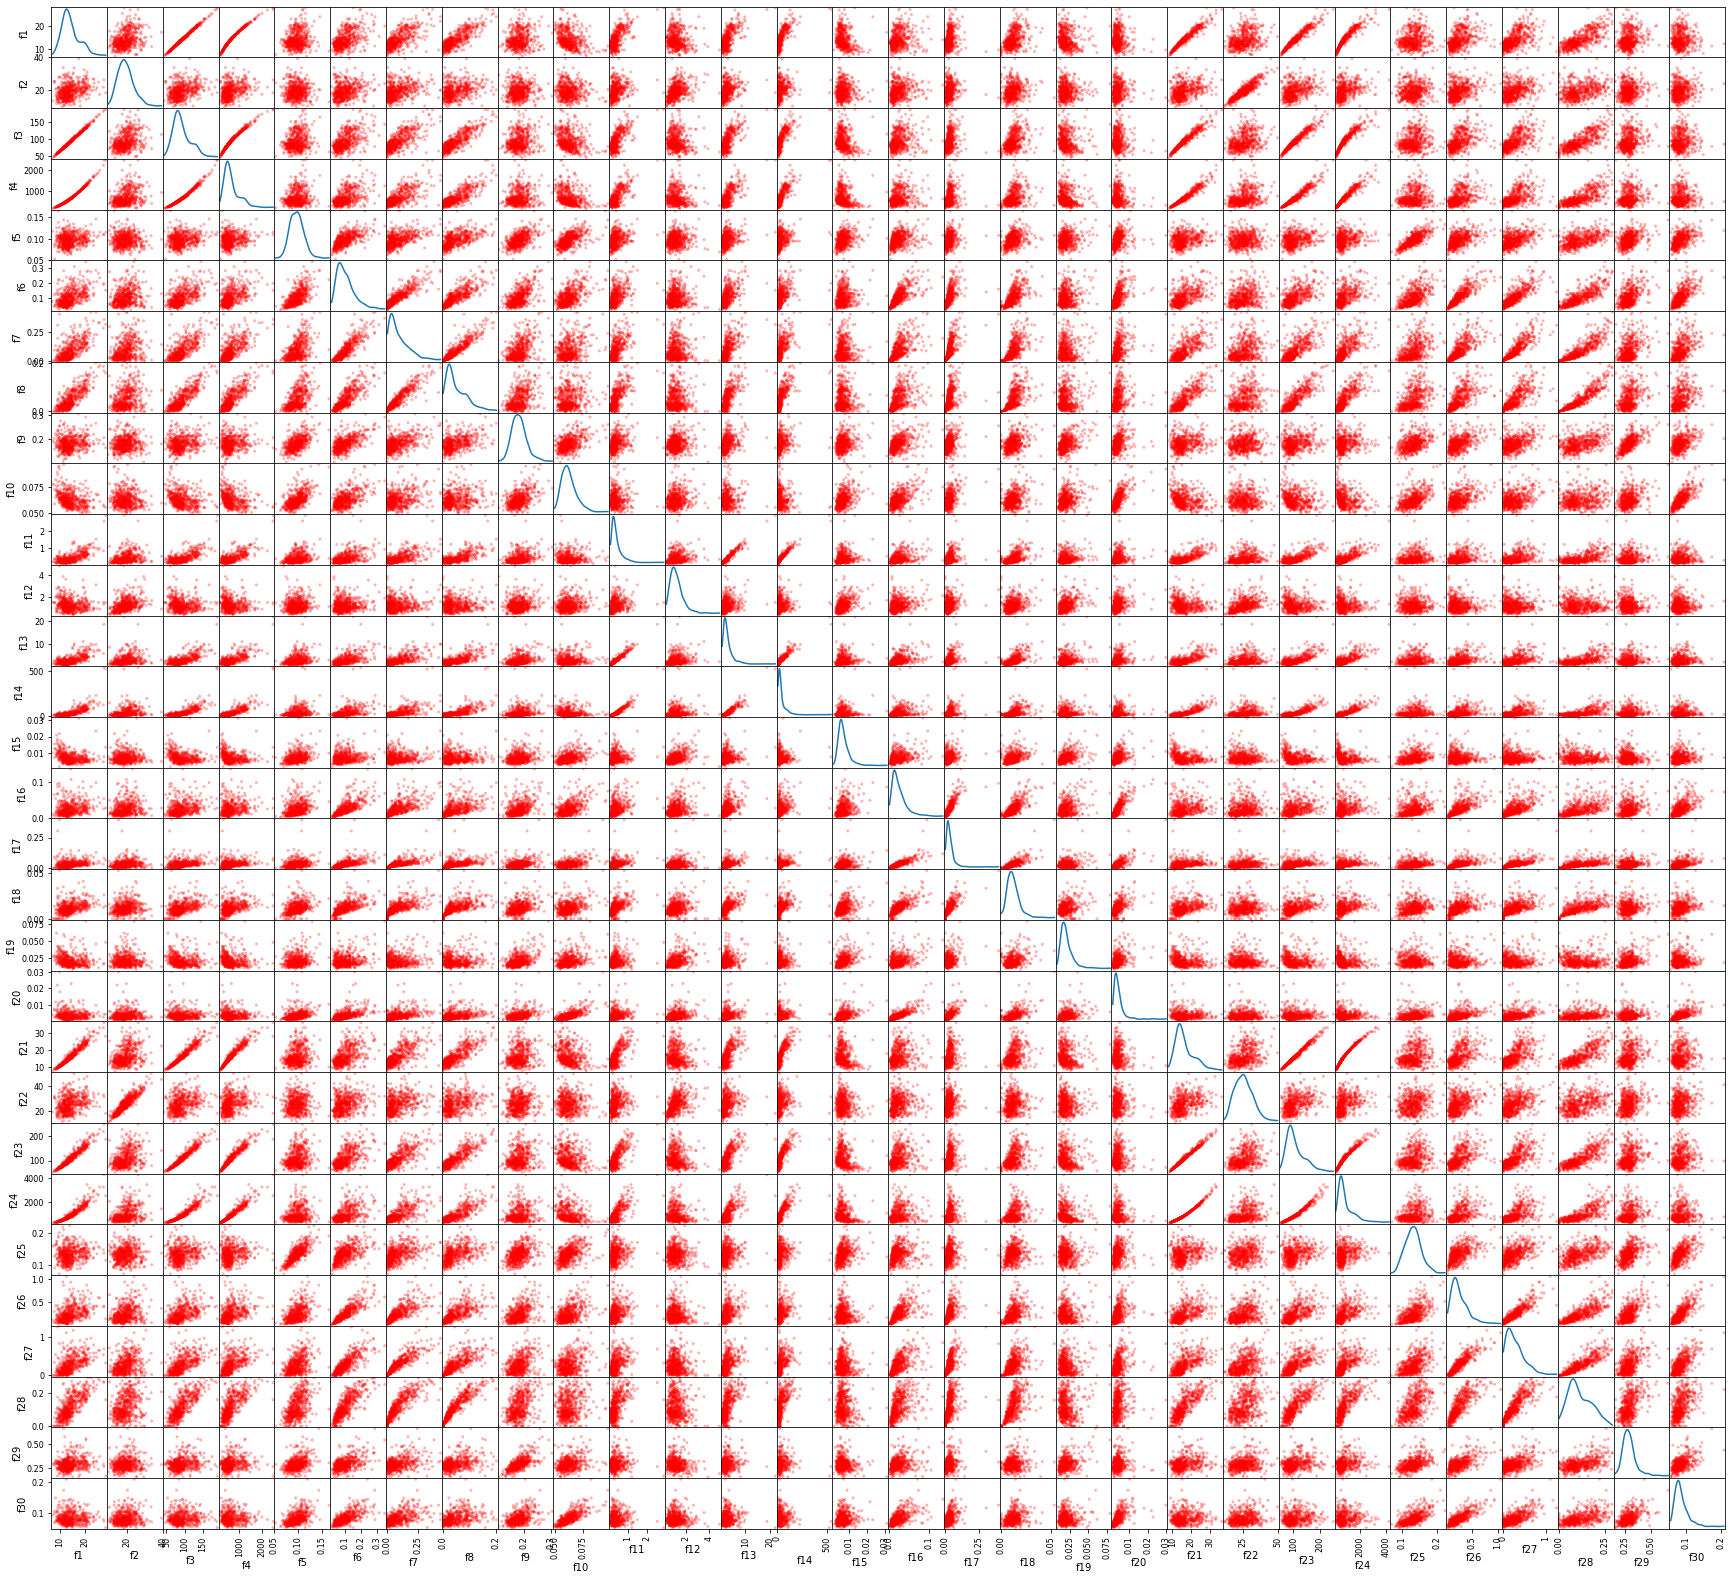

In [24]:
classs = dataset['diagnoses']
features = dataset.drop(['diagnoses'], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (30,28), diagonal = 'kde', c='red');

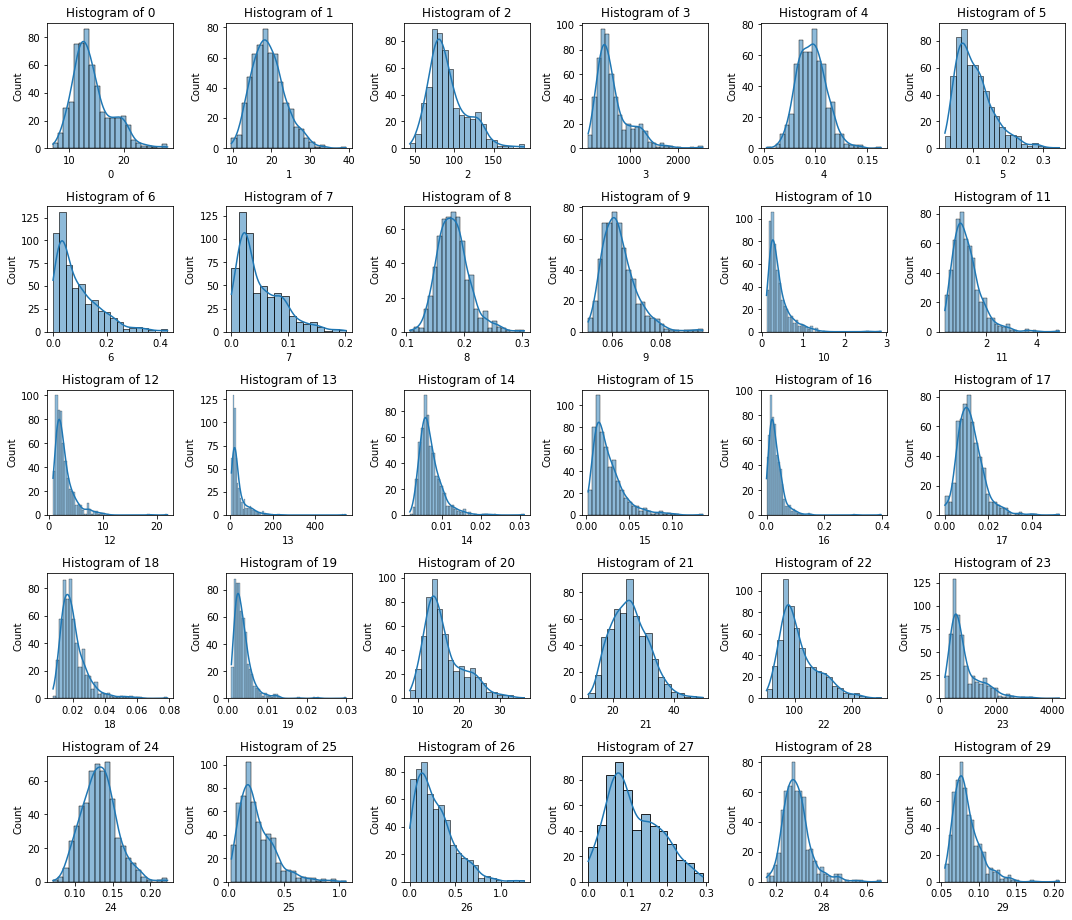

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset, replace with your actual dataset
# dataset = pd.read_csv('your_dataset.csv')

X_full = dataset.iloc[:, 1:32].values
Y_full = dataset.iloc[:, 0].values

# Handling missing values by replacing them with the median (for simplicity)
X_full = pd.DataFrame(X_full)
X_full = X_full.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (handle non-numeric values)
# X_full.fillna(X_full.median(), inplace=True)  # Fill missing values with median

# 1. Histograms (distribution of features)
plt.figure(figsize=(15, 15))  # Adjusted figure size for 6x6 grid
num_features = X_full.shape[1]

# Create subplots dynamically
for i, feature in enumerate(X_full.columns):
    plt.subplot(6, 6, i+1)  # 6x6 grid for 31 features
    sns.histplot(X_full[feature], kde=True)
    plt.title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()


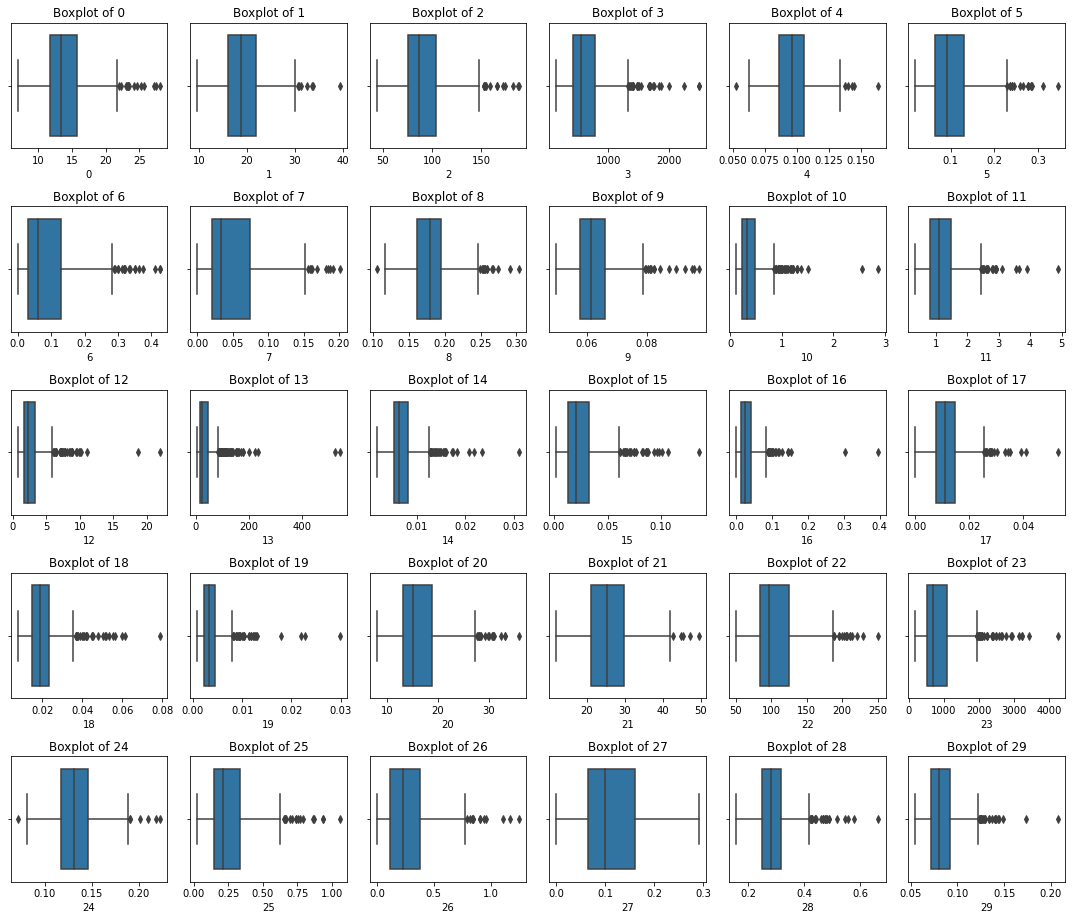

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset, replace with your actual dataset
# dataset = pd.read_csv('your_dataset.csv')

X_full = dataset.iloc[:, 1:32].values
Y_full = dataset.iloc[:, 0].values

# Handling missing values by replacing them with the median (for simplicity)
X_full = pd.DataFrame(X_full)
X_full = X_full.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (handle non-numeric values)
# X_full.fillna(X_full.median(), inplace=True)  # Fill missing values with median

# 1. Boxplots (distribution of features)
plt.figure(figsize=(15, 15))  # Adjusted figure size for 6x6 grid
num_features = X_full.shape[1]

# Create subplots dynamically for boxplots
for i, feature in enumerate(X_full.columns):
    plt.subplot(6, 6, i+1)  # 6x6 grid for 31 features
    sns.boxplot(x=X_full[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


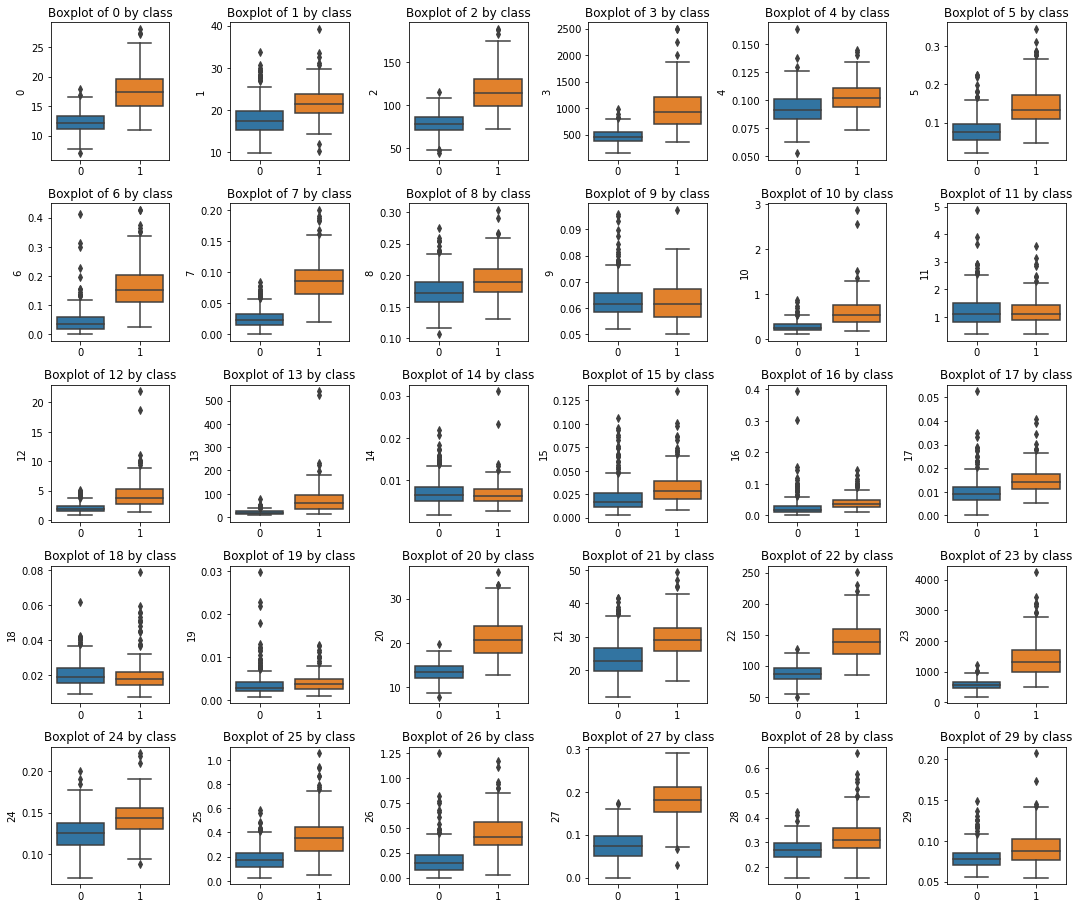

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset, replace with your actual dataset
# dataset = pd.read_csv('your_dataset.csv')

X_full = dataset.iloc[:, 1:32].values
Y_full = dataset.iloc[:, 0].values

# Handling missing values by replacing them with the median (for simplicity)
X_full = pd.DataFrame(X_full)
X_full = X_full.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (handle non-numeric values)
# X_full.fillna(X_full.median(), inplace=True)  # Fill missing values with median

# 2. Box plots (checking outliers by class)
plt.figure(figsize=(15, 15))  # Adjusted figure size for 6x6 grid
num_features = X_full.shape[1]

# Create subplots dynamically for boxplots
for i, feature in enumerate(X_full.columns):
    plt.subplot(6, 6, i+1)  # 6x6 grid for 31 features
    sns.boxplot(x=Y_full, y=X_full[feature])
    plt.title(f"Boxplot of {feature} by class")

plt.tight_layout()
plt.show()


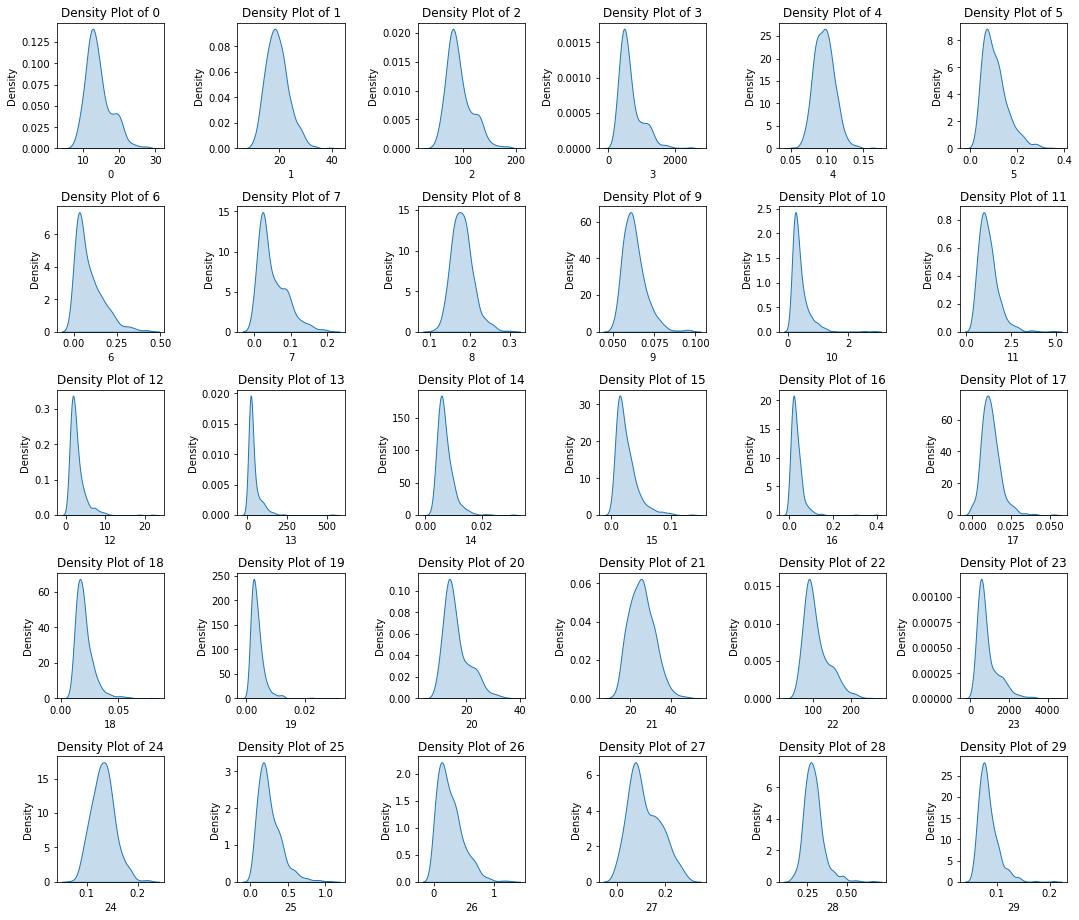

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset, replace with your actual dataset
# dataset = pd.read_csv('your_dataset.csv')

X_full = dataset.iloc[:, 1:32].values
Y_full = dataset.iloc[:, 0].values

# Handling missing values by replacing them with the median (for simplicity)
X_full = pd.DataFrame(X_full)
X_full = X_full.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (handle non-numeric values)
# X_full.fillna(X_full.median(), inplace=True)  # Fill missing values with median

# 3. Density plots (distribution of features)
plt.figure(figsize=(15, 15))  # Adjusted figure size for 6x6 grid
num_features = X_full.shape[1]

# Create subplots dynamically for density plots
for i, feature in enumerate(X_full.columns):
    plt.subplot(6, 6, i+1)  # 6x6 grid for 31 features
    sns.kdeplot(X_full[feature], shade=True)
    plt.title(f"Density Plot of {feature}")

plt.tight_layout()
plt.show()


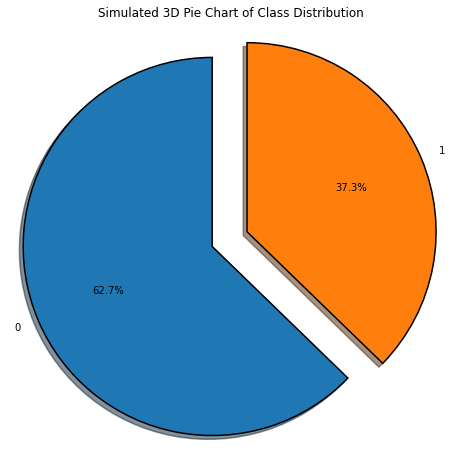

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Getting value counts of the target variable
counts = dataset['diagnoses'].value_counts()

# Creating the pie chart with enhanced 3D-like effects
fig, ax = plt.subplots(figsize=(8, 8))

# Data for the pie chart
labels = counts.index
sizes = counts.values
explode = [0.1] * len(labels)  # Exploding the slices for better visuals

# Plotting the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, 
                                  startangle=90, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Adding 3D-like effect with a shadow and setting the angle for a dynamic appearance
for wedge in wedges:
    wedge.set_linewidth(1.5)
    wedge.set_edgecolor('black')

# Customizing the appearance of the plot
ax.set_title("Simulated 3D Pie Chart of Class Distribution")
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()




# Feature Scaling

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
#sc = StandardScaler()
X_norm = MinMaxScaler().fit_transform(X)

# Chi2 Feature Selection

In [7]:
X_new = SelectKBest(chi2, k=22).fit_transform(X_norm, Y)
X_new.shape

(569, 22)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2)

# Randm Forest Clf CHI2 clf3

In [41]:
from sklearn.ensemble import RandomForestClassifier
import time
#tic = time()

start = time.time()
clf3 = RandomForestClassifier(criterion='gini', max_depth=10, random_state=123)

#t0=time()
#print("training time:", round(time()-t0, 3), "s")
clf3.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


start1 = time.time()
RF3=clf3.predict(X_test)
stop1 = time.time()
print(f"Predicting time: {stop1 - start1}s")
#toc = time()
#t1=time()
#print("Predicting time:", round(time()-t0, 3), "s")
accRF=clf3.score(X_test,Y_test)

print(accRF,'Random Forest')
print(classification_report(Y_test,RF3))

Training time: 0.2215874195098877s
Predicting time: 0.016048192977905273s
0.9649122807017544 Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [42]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import zero_one_loss
from sklearn import metrics 


Cohen_kappa = cohen_kappa_score(Y_test,RF3) 
print(" Cohen_kappa:", Cohen_kappa)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test are the true labels and RF are the predicted labels
precision = precision_score(Y_test, RF3)
recall = recall_score(Y_test, RF3)
f1 = f1_score(Y_test, RF3)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


MCC = matthews_corrcoef(Y_test,RF3)
print('MCC:', MCC)

 Cohen_kappa: 0.9210799584631361
Precision: 0.972972972972973
Recall: 0.9230769230769231
F1 Score: 0.9473684210526315
MCC: 0.9217979006872221


Confusion matrix, without normalization
[[74  1]
 [ 3 36]]


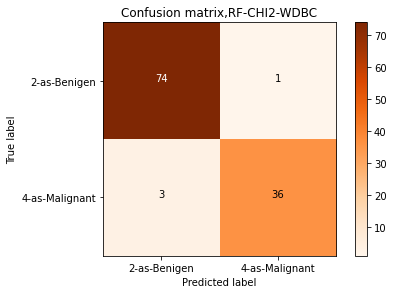

Normalized confusion matrix
[[0.99 0.01]
 [0.08 0.92]]


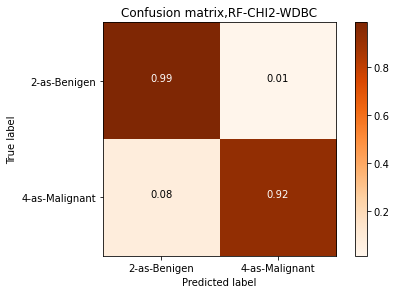

In [43]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Oranges):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, RF3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,RF-CHI2-WDBC')
plt.show()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,RF-CHI2-WDBC')
plt.show()

# RFE Feature selection

In [44]:
from sklearn.svm import LinearSVC, SVR
from sklearn.feature_selection import RFE
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=24)
selector = selector.fit(X_norm, Y)

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)  # Make sure x_scaled is 2D (shape: [n_samples, n_features])

# Define the estimator for RFE (Support Vector Regression with a linear kernel)
estimator = SVR(kernel="linear")

# Initialize the RFE selector with the estimator and number of features to select
selector = RFE(estimator, n_features_to_select=24)  # Adjust the number as needed (e.g., 7 features)

# Fit the RFE selector to the scaled data
selector.fit(x_scaled, Y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=24)

In [46]:


# Get the selected features (True means the feature was selected)
selected_features = selector.support_  
print("Selected features:", selected_features)

# Prepare the data with the selected features (extract the selected columns from the original scaled data)
x_selected = x_scaled[:, selected_features]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_selected, Y, test_size=0.2, random_state=42)



Selected features: [ True  True  True  True False  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False False  True  True]


In [51]:

from sklearn.ensemble import RandomForestClassifier
import time
#tic = time()

start = time.time()
clf4 = RandomForestClassifier(criterion='gini', max_depth=6, random_state=42)

#t0=time()
#print("training time:", round(time()-t0, 3), "s")
clf4.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


start1 = time.time()
RF4=clf4.predict(X_test)
stop1 = time.time()
print(f"Predicting time: {stop1 - start1}s")
#toc = time()
#t1=time()
#print("Predicting time:", round(time()-t0, 3), "s")
accRF=clf4.score(X_test,Y_test)

print(accRF,'Random Forest')
print(classification_report(Y_test,RF4))

Training time: 0.23281311988830566s
Predicting time: 0.02108621597290039s
0.9649122807017544 Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [52]:
Cohen_kappa = cohen_kappa_score(Y_test,RF4) 
print(" Cohen_kappa:", Cohen_kappa)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test are the true labels and RF are the predicted labels
precision = precision_score(Y_test, RF4)
recall = recall_score(Y_test, RF4)
f1 = f1_score(Y_test, RF4)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


MCC = matthews_corrcoef(Y_test,RF4)
print('MCC:', MCC)

 Cohen_kappa: 0.9246280991735537
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
MCC: 0.9252853920667758


Confusion matrix, without normalization
[[70  1]
 [ 3 40]]


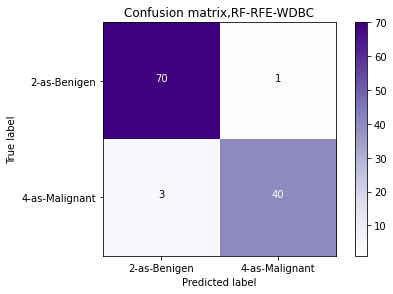

Normalized confusion matrix
[[0.99 0.01]
 [0.07 0.93]]


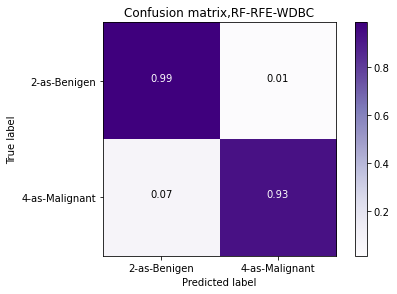

In [53]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Purples):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, RF4)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,RF-RFE-WDBC')
plt.show()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,RF-RFE-WDBC')
plt.show()

# PCA

Text(0.5, 1.0, 'WDBC data PCA=2: PC1 vs PC2 ')

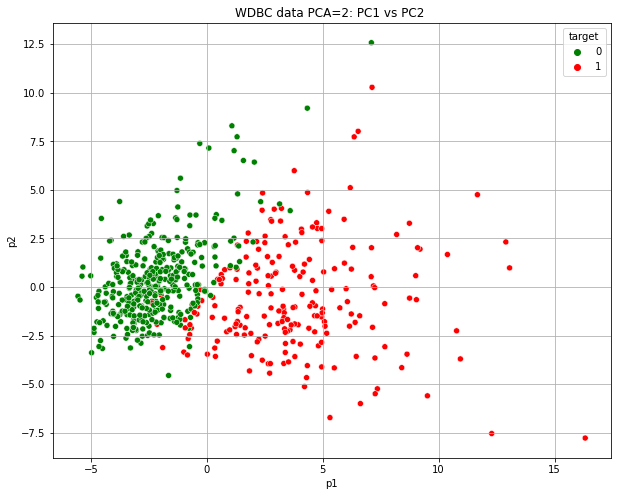

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
sc = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1", "p2"])
pca_data["target"] = Y
plt.figure(figsize=(10,8))

sns.scatterplot(x="p1", y="p2" , hue="target", data=pca_data,palette=['green','red'], legend='full')
plt.grid()
plt.title("WDBC data PCA=2: PC1 vs PC2 ")

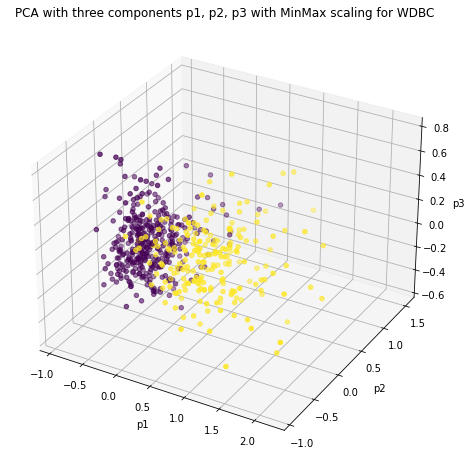

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming Xil and Yil are defined earlier in your code
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3, random_state=42)  # Set components to 3 for 3D projection
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)  # Transform data into 3D

# Create a DataFrame for the reduced PCA components and add the target labels
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1", "p2", "p3"])
pca_data["target"] = Y

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D with color based on target class
scatter = ax.scatter(pca_data["p1"], pca_data["p2"], pca_data["p3"], c=pca_data["target"], cmap='viridis')

# Adding axis labels and title
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')
ax.set_title("PCA with three components p1, p2, p3 with MinMax scaling for WDBC")

# Show the plot
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced_pca, Y, test_size = 0.2)

In [63]:
from sklearn.ensemble import RandomForestClassifier
import time
#tic = time()

start = time.time()
clf2 = RandomForestClassifier(criterion='gini', max_depth=100, random_state=42)

#t0=time()
#print("training time:", round(time()-t0, 3), "s")
clf2.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


start1 = time.time()
RF2=clf2.predict(X_test)
stop1 = time.time()
print(f"Predicting time: {stop1 - start1}s")
#toc = time()
#t1=time()
#print("Predicting time:", round(time()-t0, 3), "s")
accRF=clf2.score(X_test,Y_test)

print(accRF,'Random Forest')
print(classification_report(Y_test,RF2))

Training time: 0.26549220085144043s
Predicting time: 0.022425413131713867s
0.9385964912280702 Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.94      0.87      0.91        39

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [64]:

Cohen_kappa = cohen_kappa_score(Y_test,RF2) 
print(" Cohen_kappa:", Cohen_kappa)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test are the true labels and RF are the predicted labels
precision = precision_score(Y_test, RF2)
recall = recall_score(Y_test, RF2)
f1 = f1_score(Y_test, RF2)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


MCC = matthews_corrcoef(Y_test,RF2)
print('MCC:', MCC)

 Cohen_kappa: 0.8610240334378265
Precision: 0.9444444444444444
Recall: 0.8717948717948718
F1 Score: 0.9066666666666667
MCC: 0.8625553624159567


Confusion matrix, without normalization
[[73  2]
 [ 5 34]]


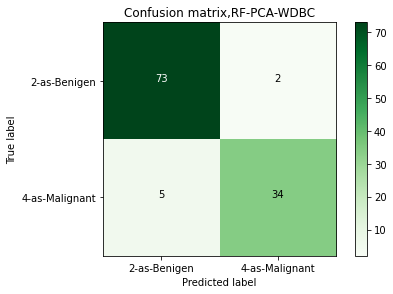

Normalized confusion matrix
[[0.97 0.03]
 [0.13 0.87]]


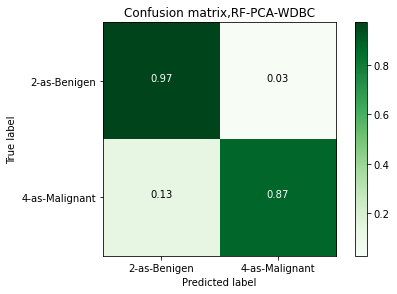

In [65]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Greens):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, RF2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,RF-PCA-WDBC')
plt.show()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,RF-PCA-WDBC')
plt.show()

# FACTOR ANALYSIS

Text(0.5, 1.0, 'Factor Analysis with two components p1 vs p2 with MinMax scaling WDBC ')

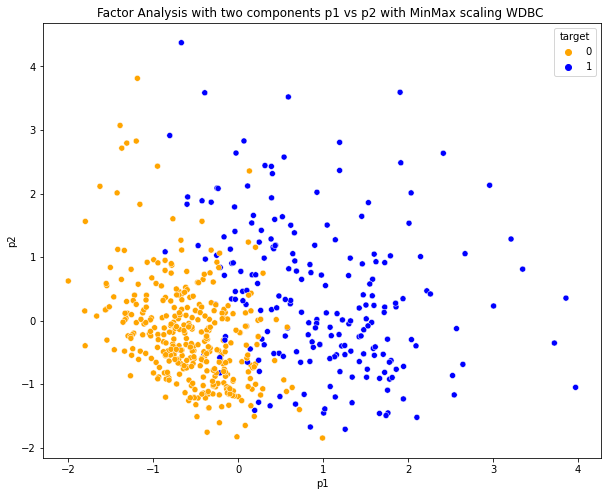

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(x_scaled)
X_reduced_fa = fa.transform(x_scaled)
fa_data = pd.DataFrame(X_reduced_fa, columns=["p1", "p2"])
fa_data["target"] = Y
plt.figure(figsize=(10,8))

sns.scatterplot(x="p1", y="p2" , hue="target", data=fa_data,palette=['orange','blue'], legend='full')

plt.title("Factor Analysis with two components p1 vs p2 with MinMax scaling WDBC ")

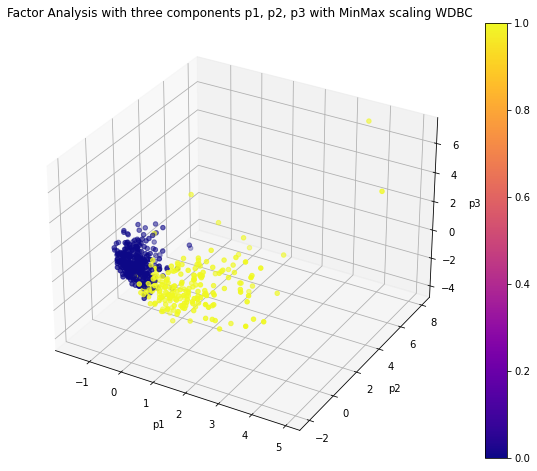

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming Xil and Yil are defined earlier in your code
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

fa = FactorAnalysis(n_components=3, random_state=42)  # Set components to 3 for 3D
fa.fit(x_scaled)
X_reduced_fa = fa.transform(x_scaled)
fa_data = pd.DataFrame(X_reduced_fa, columns=["p1", "p2", "p3"])
fa_data["target"] = Y

# Creating a 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(fa_data["p1"], fa_data["p2"], fa_data["p3"], c=fa_data["target"], cmap='plasma')

# Adding labels
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')
ax.set_title("Factor Analysis with three components p1, p2, p3 with MinMax scaling WDBC")

# Show color bar
plt.colorbar(scatter)

plt.show()


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced_fa, Y, test_size = 0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier
import time
#tic = time()

start = time.time()
clf1 = RandomForestClassifier(criterion='gini', max_depth=100, random_state=42)

#t0=time()
#print("training time:", round(time()-t0, 3), "s")
clf1.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


start1 = time.time()
RF=clf1.predict(X_test)
stop1 = time.time()
print(f"Predicting time: {stop1 - start1}s")
#toc = time()
#t1=time()
#print("Predicting time:", round(time()-t0, 3), "s")
accRF=clf1.score(X_test,Y_test)

print(accRF,'Random Forest')
print(classification_report(Y_test,RF))

Training time: 0.1776125431060791s
Predicting time: 0.015622138977050781s
0.9385964912280702 Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        65
           1       0.96      0.90      0.93        49

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [75]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import zero_one_loss



Cohen_kappa = cohen_kappa_score(Y_test,RF) 
print(" Cohen_kappa:", Cohen_kappa)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test are the true labels and RF are the predicted labels
precision = precision_score(Y_test, RF)
recall = recall_score(Y_test, RF)
f1 = f1_score(Y_test, RF)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



MCC = matthews_corrcoef(Y_test,RF)
print('MCC:', MCC)


 Cohen_kappa: 0.8737741221132553
Precision: 0.9565217391304348
Recall: 0.8979591836734694
F1 Score: 0.9263157894736843
MCC: 0.8750554695464113


Confusion matrix, without normalization
[[63  2]
 [ 5 44]]


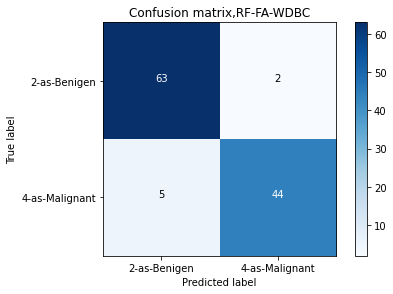

Normalized confusion matrix
[[0.97 0.03]
 [0.1  0.9 ]]


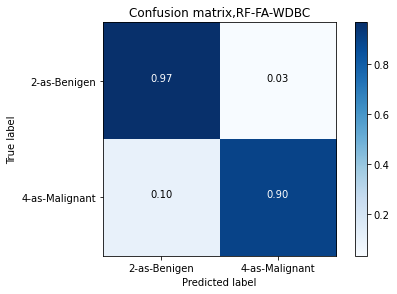

In [76]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues, fontsize= 40):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, RF)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,RF-FA-WDBC',fontsize=40)
plt.show()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,RF-FA-WDBC',fontsize=40)
plt.show()

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming Xil and Yil are defined

# Step 1: Scale the data using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA (increase the number of components)
pca = PCA(n_components=5)  # Increased to 5 components
X_reduced_pca = pca.fit_transform(x_scaled)

# Visualize explained variance ratio (optional)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3: Apply RFE to the PCA-transformed data
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5)  # Select 5 features
selector.fit(X_reduced_pca, Y)

# Get the selected features
selected_features = selector.support_  # This is a boolean array
print("Selected features:", selected_features)

# Prepare the data with the selected features
x_selected = X_reduced_pca[:, selected_features]

# Step 4: Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_selected, Y, test_size=0.2, random_state=123)

# Step 5: Train a Random Forest Classifier on the selected features
# Tune the hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Best parameters found from grid search
print(f"Best parameters: {grid_search.best_params_}")

# Use the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Step 6: Make predictions
Y_pred = best_rf_classifier.predict(X_test)

# Step 7: Evaluate the model using accuracy score and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Random Forest Classifier on selected features: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)



Explained variance ratio: [0.44 0.19 0.09 0.07 0.05]
Selected features: [ True  True  True  True  True]
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of Random Forest Classifier on selected features: 0.9825
Confusion Matrix:
[[73  0]
 [ 2 39]]


In [80]:
from sklearn.ensemble import RandomForestClassifier
import time
#tic = time()

start = time.time()
#clf4 = RandomForestClassifier(criterion='gini', max_depth=10, random_state=123)

#t0=time()
#print("training time:", round(time()-t0, 3), "s")
best_rf_classifier.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


start1 = time.time()
RF5=best_rf_classifier.predict(X_test)
stop1 = time.time()
print(f"Predicting time: {stop1 - start1}s")
#toc = time()
#t1=time()
#print("Predicting time:", round(time()-t0, 3), "s")
accRF=best_rf_classifier.score(X_test,Y_test)

print(accRF,'Random Forest')
print(classification_report(Y_test,RF5))

Training time: 0.21268510818481445s
Predicting time: 0.011841297149658203s
0.9824561403508771 Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [81]:

Cohen_kappa = cohen_kappa_score(Y_test,RF5) 
print(" Cohen_kappa:", Cohen_kappa)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test are the true labels and RF are the predicted labels
precision = precision_score(Y_test, RF5)
recall = recall_score(Y_test, RF5)
f1 = f1_score(Y_test, RF5)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


MCC = matthews_corrcoef(Y_test,RF5)
print('MCC:', MCC)

 Cohen_kappa: 0.961499493414387
Precision: 1.0
Recall: 0.9512195121951219
F1 Score: 0.975
MCC: 0.9622128966796202


Confusion matrix, without normalization
[[73  0]
 [ 2 39]]


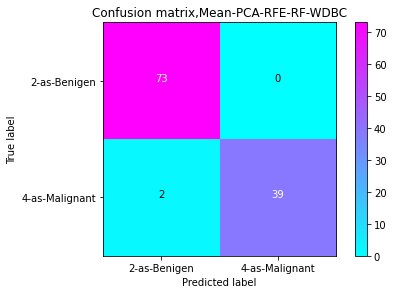

Normalized confusion matrix
[[1.   0.  ]
 [0.05 0.95]]


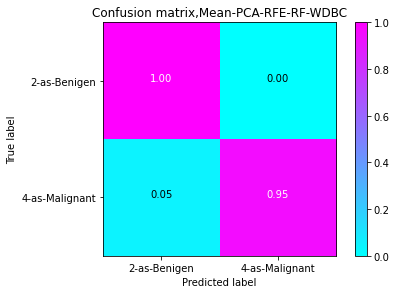

In [86]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.cool):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, RF5)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,Mean-PCA-RFE-RF-WDBC')
plt.show()
classs=['2-as-Benigen','4-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,Mean-PCA-RFE-RF-WDBC')
plt.show()